# Индивидуальное задание 2

> Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения столбчатой диаграммы.

Измерена максимальная ёмкость 20 подстроечных конденсаторов, и 
результаты измерений (в пикофарадах) приведены в таблице:

Номер конденсатора | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10
--- | | | | | | | | | | |
Емкость, пкФ | 4,40 | 4,31 | 4,40 | 4,40 | 4,65 | 4,56 | 4,71 | 4,54 | 4,36 | 4,56

Номер конденсатора | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20
--- | | | | | | | | | | |
Емкость, пкФ | 4,31 | 4,42 | 4,60 | 4,35 | 4,50 | 4,40 | 4,43 | 4,48 | 4,42 | 4,45

Построить группированный статистический ряд и изобразить его в виде 
гистограммы. Оценить генеральные числовые характеристики с помощью 
группированного статистического ряда.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
%matplotlib inline

In [2]:
x = [4.40, 4.31, 4.40, 4.40, 4.65, 4.56, 4.71, 4.54, 4.36, 4.56,
    4.31, 4.42, 4.60, 4.35, 4.50, 4.40, 4.43, 4.48, 4.42, 4.45]
n = np.arange(1, 20, 1)

Промежуток \[$x_{min}, x_{max}$\] делится на некоторое число $k$ равных по длине промежутков. Обозначим эти промежутки слева направо через $Δ_1, Δ_2,..., Δ_k$. Если точки, разделяющие промежутки обозначить $a_0, a_1,..., a_k$, то $Δ_1 = [x_{min}, a_1), Δ_2 = [a_1, a_2),..., Δ_k = [a_{k-1}, x_{max}]$. Пусть $n_i$ - число элементов выборки, попавших в промежуток $Δ_i$. Числа $n_1, n_2,..., n_k$ называются частотами попадания элементов выборки в рассматриваемые промежутки.  
Совокупность промежутков $Δ_1, Δ_2,..., Δ_k$ и соответствующих им частот называется группированным статистическим рядом

Для определения $k$ можно использовать формулу Стёрджесса: $k = 1 + 3.3\lg(n)$

In [3]:
k = 1 + 3.3 * cm.log10(n.size)
k = round(k.real)
print(f"Число промежутков: {k}")

Число промежутков: 5


Длина промежутков $Δ_1, Δ_2,..., Δ_k$ определится по формуле \begin{equation} h = \frac{(x_{max} - x_{min})}{k} \end{equation}

In [4]:
h = round((np.max(x) - np.min(x)) / k, 3)
print(f"Длина проежутков: {h}")

Длина проежутков: 0.08


Определим промежутки $Δ_1, Δ_2,..., Δ_k$.

In [5]:
xs = np.sort(x)
s = np.arange(np.min(xs), np.max(xs) - h, h)
Δ = [xs[(xs <= (i + h)) & (xs >= i)] for i in s]
diaps = [print(f"Δ_{count + 1} = {value}") 
         for count, value in enumerate(Δ)]

Δ_1 = [4.31 4.31 4.35 4.36]
Δ_2 = [4.4  4.4  4.4  4.4  4.42 4.42 4.43 4.45]
Δ_3 = [4.48 4.5  4.54]
Δ_4 = [4.56 4.56 4.6 ]
Δ_5 = [4.65 4.71]


Вместо группы элементов, попавших в интервал $Δ_i$, рассматривается 
один их представитель. В качестве такого представителя обычно берут 
среднюю точку $x_i^*$ промежутка $Δ_i$. Следует считать, что элемент $x_i^*$ встречается в выборке $n_i$ раз, то есть имеет частоту $n_i$.

In [6]:
xi = [np.round(np.mean(i), 2) for i in Δ]
ni = [np.size(i) for i in Δ]
print(f"x_i = {xi}")
print(f"n_i = {ni}")

x_i = [4.33, 4.42, 4.51, 4.57, 4.68]
n_i = [4, 8, 3, 3, 2]


### Группированный статистический ряд

$x_i$ | 4.33 | 4.42 | 4.51 | 4.57 | 4.68
---| | | | | |
$n_i$ | 4 | 8 | 3 | 3 | 2

Гистограммой частот называют ступенчатую фигуру, состоящую из  прямоугольников, основаниями которых служат частичные интервалы 
длиною $h$, а высоты равны отношению $\frac{n_i}{h}$ (плотность частоты).

<BarContainer object of 5 artists>

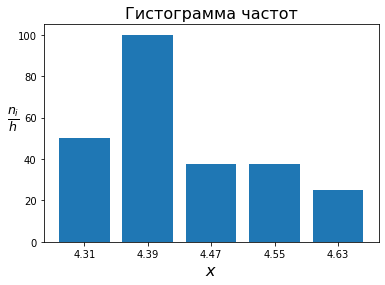

In [7]:
fig, ax = plt.subplots()

groups = [f"{i}" for i in s]
counts = [i / h for i in ni]

ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$\frac{n_i}{h}$", rotation=0, fontsize=18)

ax.set_title("Гистограмма частот", fontsize=16)

ax.bar(groups, counts)

Определим выборочную среднюю и выборочный начальный момент второго порядка по формулам:
\begin{equation} \overline{x} = \frac{1}{n} \sum_{i = 1}^{k} n_i x_i^* \end{equation}
\begin{equation} a_l = \frac{1}{n} \sum_{i = 1}^{k} n_i (x_i^*)^l \end{equation}

In [8]:
xv = np.round(1 / np.size(n) * np.sum([
    ni[i] * xi[i] for i in np.arange(0, k)]), 4)
a2 = np.round(1 / np.size(n) * np.sum([
    ni[i] * pow(xi[i], 2) for i in np.arange(0, k)]), 4)
print(f"Выборочная средняя: {xv}")
print(f"Выборочный начальный момент второго порядка: {a2}")

Выборочная средняя: 4.6989
Выборочный начальный момент второго порядка: 20.9877
